### 3. 회귀 알고리즘과 모델 규제
#### 3-1. k-최근접 이웃 회귀 
- 지도학습 알고리즘 
    - 분류 : 샘플을 몇 개의 클래스 중 하나로 분류
    - 회귀 : 임의의 어떤 숫자를 예측 ex) 내년도 경제 성장률 예측, 배달 도착 시간 예측<br>
    두 변수 사이의 상관관계를 분석하는 방법

<div style="display: flex; justify-content: left;">
  <img src="https://github.com/HANISY/AI-Study/blob/main/img/KNN1.jpg?raw=true" width="500">
  <img src="https://github.com/HANISY/AI-Study/blob/main/img/KNN2.jpg?raw=true" width="500">
</div>

In [87]:
# 훈련 데이터 준비 
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

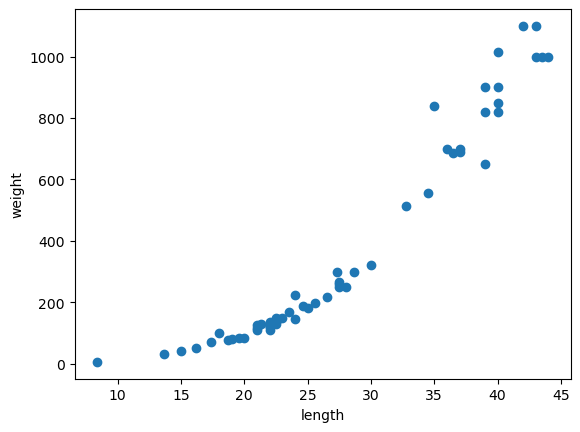

In [88]:
# 산점도로 데이터 형태 파악하기 

import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [89]:
# 훈련 세트와 테스트 세트로 나누기 

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

In [90]:
# 2차원 배열 만들기
# 사이킷런에 사용할 훈련 세트는 2차원 배열이어야 함 

test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [91]:
test_array = test_array.reshape(2, 2)       # reshape() 메서드에 지정한 크기가 원본 배열에 있는 원소의 개수와 다르면 에러 발생 
print(test_array.shape)

(2, 2)


In [92]:
train_input = train_input.reshape(-1, 1)        # -1 : 원소 개수만 맞으면 나머지 차원은 넘파이가 자동으로 계산
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [93]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [94]:
# 테스트 세트 점수 확인
print(knr.score(test_input, test_target))

0.992809406101064


$R^2 = 1 - \dfrac{\sum{(타깃 - 예측)^2}}{\sum{(타깃 - 평균)^2}}$

타깃의 평균 정도를 예측 하는 수준이라면 결정계수는 0에 가까워지고, 예측이 타깃에 아주 가까워지면 1에 가까운 값이 됨 

In [95]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측 생성
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차 계싼
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [96]:
print(knr.score(train_input, train_target))

0.9698823289099254


- 과대적합 : 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서 점수가 굉장히 나쁜 경우<br>
훈련세트에만 잘 맞는 모델을 의미
- 과소적합 : 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우<br>
모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우 

과소적합인 경우 -> 모델을 조금 더 복잡하게 구성 -> (k-최근접 이웃 알고리즘의 경우) 이웃의 개수 k를 작게 설정 

In [97]:
# 이웃의 개수를 3으로 설정
knr.n_neighbors = 3

# 모델 재훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [98]:
print(knr.score(test_input, test_target))

0.9746459963987609


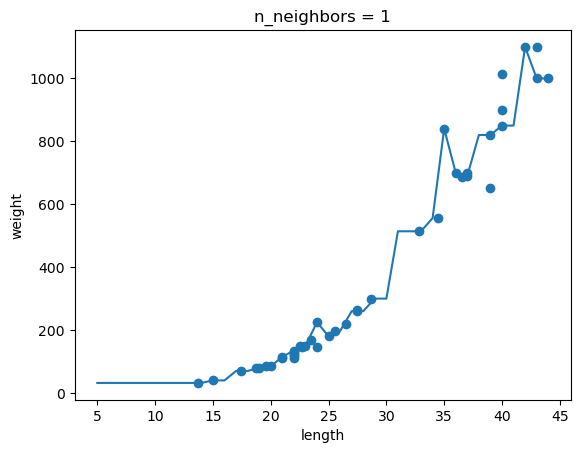

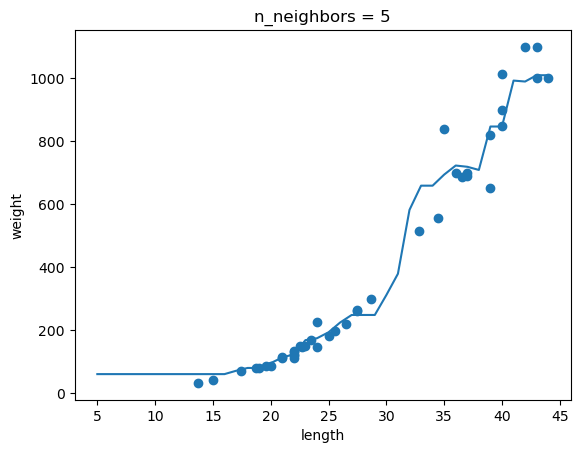

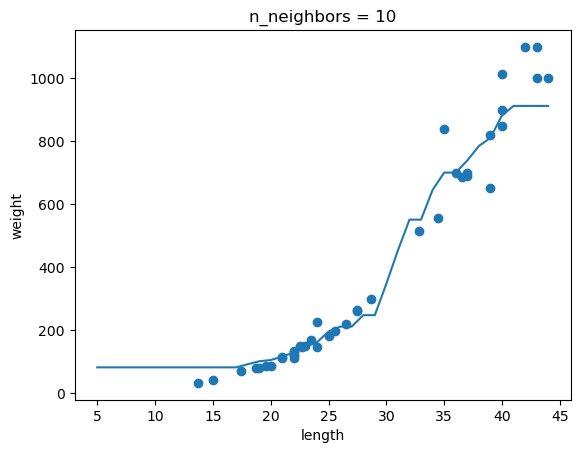

In [99]:
# 마무리
# k-최근점 이웃 회귀 객체 만들기 
# knr = KNeighborRegressor()

# 5에서 45까지 x 좌표 만들기 
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그리기 
for n in [1, 5, 10]:
    
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)

    # 지정한 범위 x에 대한 예측 구하기 
    prediction = knr.predict(x)

    # 훈련 세트와 예측 결과를 그래프로 그리기 
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

- n=1 → 훈련 데이터에 완전히 맞추는 거의 꺾이는 그래프
- n=5 → 다소 부드럽게
- n=10 → 훨씬 평탄한 회귀선

즉, n_neighbors가 커질수록 모델이 더 일반화되어 매끄러운 곡선이 그려짐 

---
#### 3-2. 선형 회귀

In [100]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [101]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 구분
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

# 훈련 세트와 테스트 세트를 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [102]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

# 길이가 50cm인 농어의 무게 예측
print(knr.predict([[50]]))

[1033.33333333]


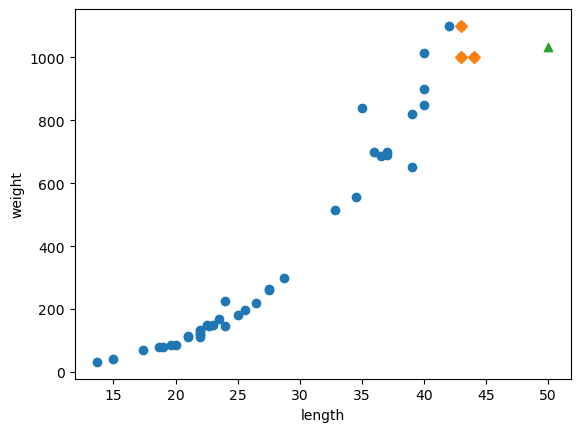

In [103]:
# 훈련 세트와 50cm 농어 그리고 예측 대상 농어의 최근접 이웃을 산점도에 표시 

import matplotlib.pyplot as plt

# 50cm 농어의 이웃
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도 작성
plt.scatter(train_input, train_target)

# 훈련 세트 중 이웃 샘플만 재작성
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

# 50cm 농어 데이터 
plt.scatter(50, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [104]:
print(np.mean(train_target[indexes]))

1033.3333333333333


k-최근접 이웃 알고리즘은 이웃 샘플들의 평균값을 반환한다는 것을 알 수 있음 

In [105]:
print(knr.predict([[100]]))

[1033.33333333]


k-최근접 이웃 알고리즘은 가장 가까운 샘플을 찾아 타깃을 평균하기 때문에 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측함

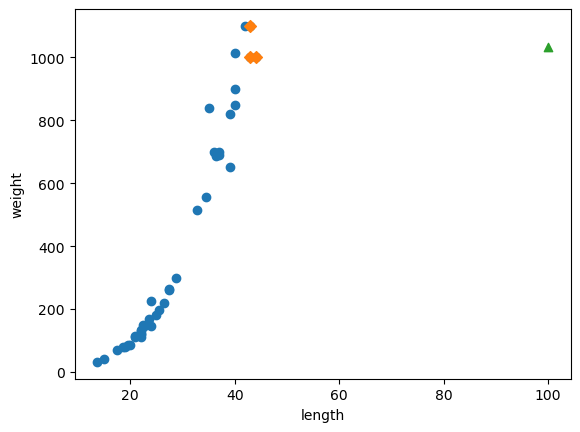

In [106]:
# 100cm 농어의 이웃 구하기
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도 그리기 
plt.scatter(train_input, train_target)

# 훈련 세트 중 이웃 샘플만 다시 그리기 
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터 
plt.scatter(100, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [107]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대한 예측 
print(lr.predict([[50]]))

[1241.83860323]


<img src="https://github.com/HANISY/AI-Study/blob/main/img/GRAPH1.jpg?raw=true" width="600">

In [108]:
print(lr.coef_, lr.intercept_)      # 머신러닝에서는 기울기를 종종 계수(coefficient)또는 가중치(weight)라고 부름

[39.01714496] -709.0186449535477


| 구분       | 핵심 개념           | 예시         |
| -------- | --------------- | ---------- |
| 모델 파라미터  | 학습으로 결정되는 내부 값  | 회귀계수, 가중치  |
| 모델 기반 학습 | 수학적 관계를 학습하는 방식 | 선형회귀, 신경망  |
| 사례 기반 학습 | 데이터 자체로 예측하는 방식 | KNN, 최근접이웃 |

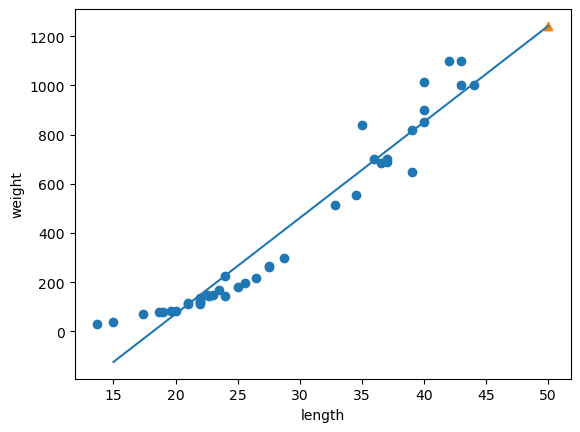

In [109]:
# 훈련 세트의 산점도 그리기 
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프 그리기 
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터 
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [110]:
print(lr.score(train_input, train_target))      # 훈련 세트
print(lr.score(test_input, test_target))        # 테스트 세트 

0.9398463339976041
0.8247503123313559


<img src="https://github.com/HANISY/AI-Study/blob/main/img/GRAPH2.jpg?raw=true" width="600">

In [111]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [112]:
# train_poly를 사용하여 선형 회귀 모델 재훈련 

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [113]:
print(lr.coef_, lr.intercept_) 

[  1.01433211 -21.55792498] 116.0502107827827


- **다항 회귀** : 다항식을 사용한 선형 회귀 

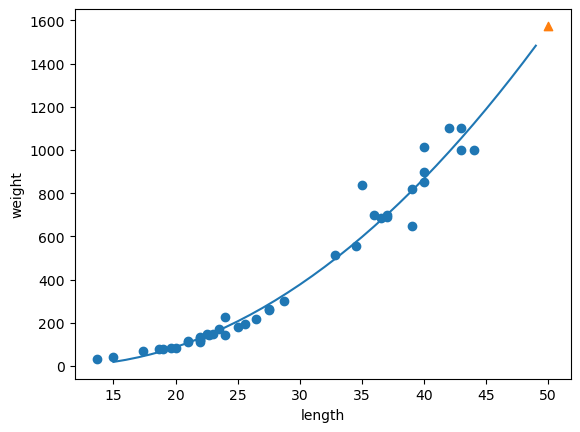

In [114]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열 만들기
point = np.arange(15, 50)

# 훈련 세트의 산점도 그리기 
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프 그리기
plt.plot(point, 1.01*point**2 - 21.6*point + 116.02)

# 50cm 농어 데이터 
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [115]:
# 훈련 세트와 테스트 세트의 결정 계수 점수 평가 

print(lr.score(train_poly, train_target))      # 훈련 세트
print(lr.score(test_poly, test_target))        # 테스트 세트 

0.9706807451768623
0.9775935108325122


---
#### 3-3. 특성 공학과 규제 

- 다중 회귀 : 여러 개의 특성을 사용한 선형 회귀 
- 특성 공학 : 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업

<img src="https://github.com/HANISY/AI-Study/blob/main/img/GRAPH3.jpg?raw=true" width="800">

In [116]:
import pandas as pd
perch_full = pd.read_csv("https://bit.ly/perch_csv_data")
perch_full.head()       # 다섯 개 행을 출력 

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [117]:
import numpy as n
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]
       )

In [118]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

- 추정기(Estimator): “학습”과 “예측”을 담당
- 변환기(Transformer): “전처리”와 “특징 변환”을 담당

| 구분     | 추정기 (Estimator)                     | 변환기 (Transformer)                         |
| ------ | ----------------------------------- | ----------------------------------------- |
| 역할     | 모델 학습                               | 데이터 변환                                    |
| 핵심 메서드 | `fit()`, `predict()`                | `fit()`, `transform()`, `fit_transform()` |
| 출력     | 예측값 또는 모델                           | 변환된 데이터                                   |
| 예시 클래스 | `LinearRegression`, `KMeans`, `SVC` | `StandardScaler`, `PCA`, `LabelEncoder`   |


In [119]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit([[2, 3]])      # fit() 새롭게 만들 특성 조합 탐색
print(poly.transform([[2, 3]]))     # transform() 실제로 데이터를 변환

[[1. 2. 3. 4. 6. 9.]]


In [120]:
poly = PolynomialFeatures(include_bias=False)       # 절편 미포함(자동으로 무시하지만 명시적으로 지정)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [121]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [122]:
# 특성 조합 탐색
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

In [123]:
test_poly = poly.transform(test_input)

In [124]:
# 다중 회귀 모델 훈련
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982126


In [125]:
# 테스트 세트에 대한 점수 확인
print(lr.score(test_poly, test_target))

0.9714559911594095


In [126]:
# 특성을 더 많이 추가해보기

poly = PolynomialFeatures(degree=5, include_bias=False)     # degree : 필요한 고차항의 최대 차수 지정
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [127]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999976599


In [128]:
print(lr.score(test_poly, test_target))

-144.4072001577299


특성의 개수를 크게 늘리면 훈련 세트에 대해 거의 완벽하게 학습할 수 있으나, 훈련 세트에 너무 과대적합되어 테스트 세트에는 성능이 떨어지게 된다.

- 규제 : 모델의 복잡도를 제한하여 과대적합을 방지하고, 새로운 데이터에 대한 일반화 성능을 향상시키는 기법

In [129]:
from sklearn.preprocessing import StandardScaler        # 데이터 정규화 변환기
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)     # 훈련 세트로 학습한 변환기를 사용하여 테스트 세트까지 변환 필수 
test_scaled = ss.transform(test_poly)

- 릿지 회귀 : 계수의 제곱값을 기준으로 규제를 적용
- 라쏘 회귀 : 계수의 절댓값을 기준으로 규제를 적용

In [130]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [131]:
print(ridge.score(test_scaled, test_target))

0.9790693977615383


**하이퍼파라미터(Hyperparameter)** : 사람이 직접 설정해야 하는 모델 제어값, 사이킷런에서는 클래스나 메서드의 매개변수로 표현

- 릿지·라쏘 회귀의 alpha : 규제의 양을 조절
    - α 값이 클수록 규제가 강해져 계수가 작아지고 과소적합을 유도
    - α 값이 작을수록 규제가 약해져 선형회귀와 유사해지고 과대적합될 가능성 증가

    α 값에 대한 결졍계수의 그래프를 그려 혼련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 값이 됨 

In [132]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [133]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha=alpha)
    # 릿지 모델 훈련
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

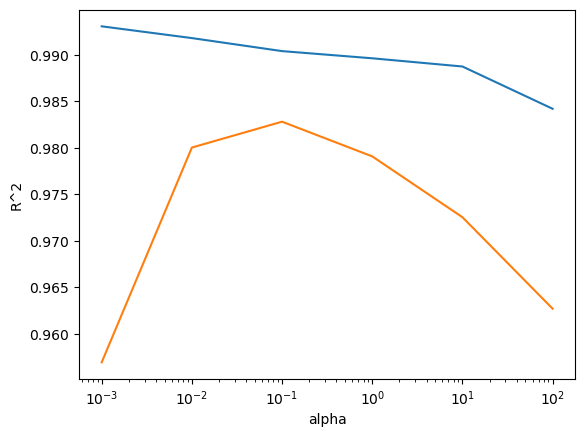

In [134]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')       # 6개의 값을 동일한 간격으로 표현
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

- 왼쪽 : 훈련 세트와 테스트 세트 점수 차이가 큼 = 과대적합 
- 오른쪽 : 훈련 세트와 테스트의 점수가 모두 낮아짐 = 과소적합

두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 0.1을 α값으로 하여 최종 모델 훈련 

In [135]:
# 릿지 모델

ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465387017


In [136]:
# 라쏘 모델

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [137]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


In [138]:
# α값을 바꾸어 가며 훈련 세트와 테스트 세트에 대한 점수 계산

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델 생성
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델 훈련
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/home/ai_study/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/home/ai_study/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


ConvergenceWarning : 지정한 반복 횟수가 부족

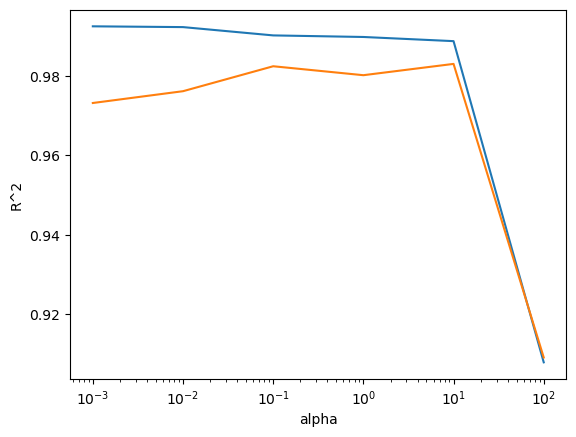

In [141]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

왼쪽은 과대접합, 오른쪽은 과소적합<br>
라쏘 모델에서 최적의 α값은 10 

In [142]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [143]:
print(np.sum(lasso.coef_ == 0))

40


40개의 독립변수(특성)가 모델의 예측에 거의 영향을 주지 않아서 완전히 제거되었다는 것을 의미함